In [149]:
## functions:
#calculate the workload of nodes  the betweeness of a node and set the weight to that
#calculate the betweeness of nodes 
#delete the node with the max betweeness or random
#keep number of connected componets and the number of nodes in the biggest component in list so that we can plot it
#distribute the weights of the deleted node to its neighbours
#repeat steps until the number of nodes in biggest connected component is below 50% or some other criteria



In [150]:
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import powerlaw as pl

#Loading the data
G=nx.read_gml('power.gml', label='id')


In [151]:
##We calculate the betweeness centrality of nodes and set the weights accordig to the most important ones
pagerank = nx.pagerank(G)
p_arr = np.array([pagerank[v] for v in G.nodes])
workload=p_arr
max_work=workload*1.25
## when max_work is set to 1.5 6 nodes get deleted on the first deletion and when set to 2 non of the nodes get overloaded

In [152]:
def node_delete():
    ##k=len(G.nodes())
    #We find the node with highest centrality(the one we are going to delete)
    pagerank = nx.pagerank(G)
    max_node = max(pagerank, key = pagerank.get)

    #We find the nodes neighbors to which we ll distribute the deleted nodes workload
    neighbors_list = list(nx.neighbors(G, max_node))
    extra_weight=workload[max_node]/len(neighbors_list)
    ##Delete the chosen node
    G.remove_node(max_node)
    ## check for overloaded neighbours and delete if overloaded
    for node in neighbors_list:
        workload[node]=workload[node]+extra_weight
        if workload[node]>max_work[node]:
            over_load(node)
        else:
            pass

    ##Set the workload of the deleted node to 0
    workload[max_node]=0
    
    ##Checking the deleted nodes and number of nodes deleted whether its correct 
    ##number=k-len(G.nodes())
    ##print('Deleted node',max_node,number)



    

In [153]:
##The over_load function deletes the overloaded node and checks for other overloaded nodes
def over_load(node):
    neighbors_list = list(nx.neighbors(G, node))
    extra_weight=workload[node]/len(neighbors_list)
    workload[node]=0
    G.remove_node(node)
    for nodes in neighbors_list:
        workload[nodes]=workload[nodes]+extra_weight
        if workload[node]>max_work[node]:
                over_load(node)
        else:
             pass
        
    ##print('Overloaded:',node)


In [154]:
##node_delete()

C:\Users\kubic\AppData\Local\Temp\ipykernel_10688\386499495.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  extra_weight=workload[node]/len(neighbors_list)
C:\Users\kubic\AppData\Local\Temp\ipykernel_10688\994169257.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  extra_weight=workload[max_node]/len(neighbors_list)


The graph collapsed after  1647 the biggest connected component had less then 50% of nodes after 128


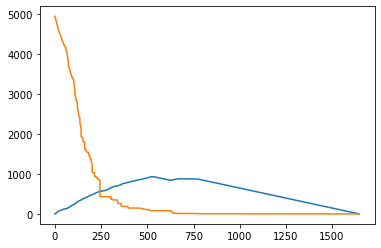

In [155]:
colapse_nr_of_nodes=len(G.nodes())/2
n_components=[]
n_nodes=[]
def plotting():
    x=nx.number_connected_components(G)
    n_components.append(x)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    y=G0.number_of_nodes()
    n_nodes.append(y)
    node_delete()

n=[]
for i in range(10000):
    plotting()
    n.append(i)
    if len(G.nodes())!= 0:
        if n_nodes[i]>colapse_nr_of_nodes:
            z=i
    else:
        print("The graph collapsed after ",i,'the biggest connected component had less then 50% of nodes after',z)
        break


plt.plot(n,n_components)
plt.plot(n,n_nodes)

    